#### Topic:      Prework Solutions
#### Cohort:   03_Spring2015
#### Date:        4/1/2015
#### Author:     Reshama

Prework: Required Exercises

https://github.com/datascopeanalytics/metis-data-science-bootcamp-prework/blob/master/exercises.md

Source:     Think Stats (section Using the Code), there is some accompanying code and data. You can get these from the Think Stats repository.
https://github.com/AllenDowney/ThinkStats2

------------------------------------------------------------------------------- 

##Table of Contents 
[Exercise01](#1) 

(Think Stats Ex 2.4) 

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?
 

[Exercise02](#2)

(Think Stats Ex 3.1) 

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.
Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb. This is an ipython notebook from the ThinkStats2 repository.


[Exercise03](#3)

(Think Stats Ex 4.2) 

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?



[Exercise04](#4)

(Think Stats Ex 7.1) 

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

[Exercise05](#5)

(Think Stats Ex 8.2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.


[Exercise06](#6)

(Think Stats Ex 2.1 Bayes)

The cookie problem is a problem discussed in sections 1.3, 2.2 and 2.3 of Think Bayes. Solve the following problem. In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.


-----------------------------------------------------------------------------------------

### <a id='1'></a> Exercise 1 
(Think Stats Ex 2.4)

a) Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. 

b) Compute Cohen’s d to quantify the difference between the groups. 

c) How does it compare to the difference in pregnancy length?

Note:  Cohen's d is an effect size used to indicate the standardised difference between two means. It can be used, for example, to accompany reporting of t-test and ANOVA results. 

####Note:

Step1.  Create a directory on your computer.  Below is an example:

/Users/reshamashaikh/ds/metis/metisgh/

Step2.  use GitHub to pull this repo to your computer

git clone https://github.com/AllenDowney/ThinkStats2.git

Step3.  Put your ipython notebook in this directory (that way, it can pull the needed dependencies):  

https://github.com/AllenDowney/ThinkStats2/tree/master/code

Step4.  Call your prework solutions notebook:  

prework_solutions_myname.ipynb

In [2]:
# set working directory
path_data = "C:\Users\user\Documents\GitHub\ThinkStats2\code"

####Answer:  chap01soln.ipynb
####First babies are lighter than others (7.20 vs 7.33)

In [81]:
import nsfg
import thinkstats2
df = nsfg.ReadFemPreg()
live = df[df.outcome == 1]
firsts = df[df.birthord==1]
others = df[df.birthord>1]
mean0 = live.totalwgt_lb.mean()
mean1 = firsts.totalwgt_lb.mean()
mean2 = others.totalwgt_lb.mean()
var1 = firsts.totalwgt_lb.var()
var2 = others.totalwgt_lb.var()
print('Difference in total weight in lbs', mean1 - mean2)
#print('Difference in total weight in oz', (mean1 - mean2) * 16)
#print('Difference relative to mean (percent)', (mean1 - mean2) / mean0 * 100)
print('On an average(mean) First-born babies are slightly lighter than other babies(7.20 lb < 7.33lb)')
d = thinkstats2.CohenEffectSize(firsts.totalwgt_lb,others.totalwgt_lb)
print('\n Cohens d for total weight difference between groups', d)
print("\n There is more difference(magnitude) in total weight between first and other babies (Cohen's d -0.0887 standard deviations ), than there is in pregnancy length ( Cohen's d 0.0289 standard deviations )")

Difference in total weight in lbs -0.124761184535
On an average(mean) First-born babies are slightly lighter than other babies(7.20 lb < 7.33lb)

 Cohens d for total weight difference between groups -0.0886729270726

 There is more difference(magnitude) in total weight between first and other babies (Cohen's d -0.0887 standard deviations ), than there is in pregnancy length ( Cohen's d 0.0289 standard deviations )


####Answer:  
####Cohen's D is:  -0.0887

Compute Cohen’s d to quantify the difference between the groups. 
How does it compare to the difference in pregnancy length? 

In [ ]:
print "Cohen's D for birth weight is:-0.0887"
print "Cohen's D for pregnancy length is:  0.0289"

####Interpretation
This site has a good interpretation of Cohen's D, effect size:
http://www.uccs.edu/lbecker/effect-size.html

 

-------------------------------------------------------------------------------------------

### <a id='2'></a> Exercise 2 
(Think Stats Ex 3.1)

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb. This is an ipython notebook from the ThinkStats2 repository.

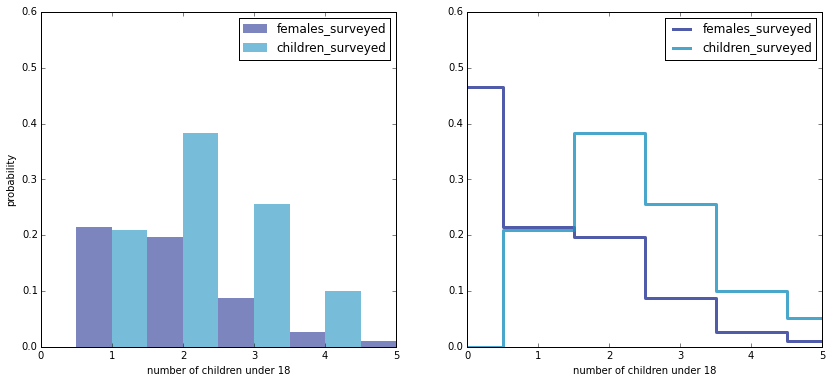

mean of actual distribution (female survey) is: 1.0 kids
mean of biased distribution (children survey) is: 2.4 kids


In [66]:
import chap01soln
resp = chap01soln.ReadFemResp()
import chap01soln
resp = chap01soln.ReadFemResp()
numberOfKidsU18col = resp['numkdhh']
import thinkstats2
pmf = thinkstats2.Pmf(numberOfKidsU18col,label='females_surveyed')
#pmf

def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf
biased_pmf = BiasPmf(pmf, label='children_surveyed')
%matplotlib inline
import thinkplot
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf, align='right', width=0.5)
thinkplot.Hist(biased_pmf, align='left', width=0.5)
thinkplot.Config(xlabel='number of children under 18',
ylabel='probability',
axis=[0, 5, 0, 0.6])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='number of children under 18',
axis=[0, 5, 0, 0.6])
#print("\n There is less difference in total weight between first and
#other babies (Cohen's d -0.0887 standard deviations ), than there is in pregnancy length ( Cohen's d 0.0289 standard deviations )")
print ("mean of actual distribution (female survey) is: %1.1f kids" %( pmf.Mean()))
print ("mean of biased distribution (children survey) is: %1.1f kids"%(biased_pmf.Mean()))

-------------------------------------------------------------------------------------------

### <a id='3'></a> Exercise 3 
(Think Stats Ex 4.2)

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

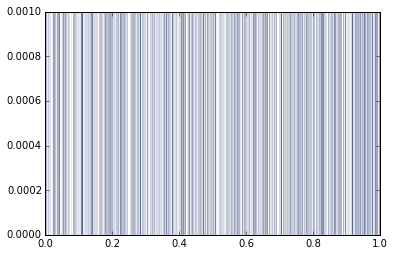

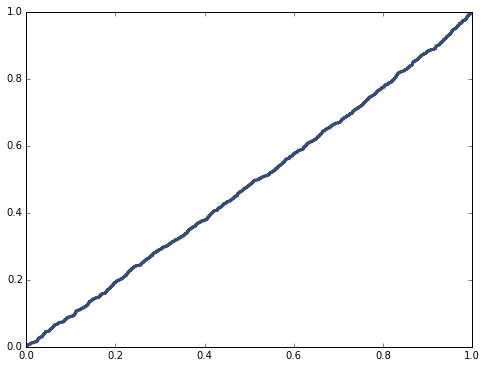

The distribution seems uniform as the the CDF functions plot is approximately a straight line


In [84]:
import thinkstats2
import nsfg
import random
import thinkplot
preg = nsfg.ReadFemPreg()
%matplotlib inline

t = [random.random() for _ in range(1000)]
pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=0.05,label='')
thinkplot.Show()

cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf,label='')
thinkplot.Show()

print('The distribution seems uniform as the the CDF functions plot is approximately a straight line')

####Answer:
Yes, distribution looks uniform

-------------------------------------------------------------------------------------------

### <a id='4'></a> Exercise 4 
(Think Stats Ex 7.1)

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

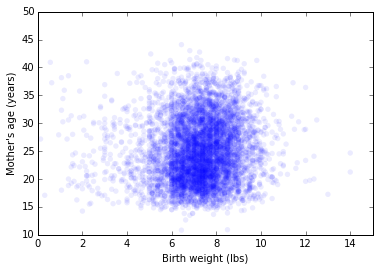

Pearson's correlation: 0.0724
Spearman's rank correlation: 0.1002
#Both values are close to zero, so we can safely conclude that there is hardly any (linear) relationship between birth weight and the age of the mother.


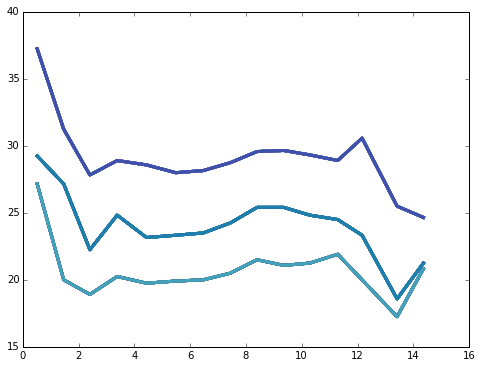

In [69]:
%matplotlib inline
import nsfg
import thinkplot
import thinkstats2

df = nsfg.ReadFemPreg()

df = df.dropna(subset=['agepreg','totalwgt_lb'])

sample = thinkstats2.SampleRows(df,6000)
birthweights_in_lbs, mothers_age_in_years = sample.totalwgt_lb, sample.agepreg

thinkplot.Scatter(birthweights_in_lbs, mothers_age_in_years, alpha=0.08)
thinkplot.Show(xlabel='Birth weight (lbs)',
               ylabel="Mother's age (years)",label='label',
               axis=[0,15,10,50])

# Plotting the percentile curves
import numpy as np
bins = np.arange(0,15,1)
indices = np.digitize(df.totalwgt_lb, bins)
groups = df.groupby(indices)
#Bin the data by age and plot percentiles of weight for each bin.df: DataFrame
for i, group in groups:
    birth_weights = [group.totalwgt_lb.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
    for percent in [75,50,25]:
        ages = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(birth_weights,
                       ages,
                       label=label)
        
print ("Pearson's correlation: %1.4f" %thinkstats2.Corr(birthweights_in_lbs, mothers_age_in_years))
print ("Spearman's rank correlation: %1.4f" %thinkstats2.SpearmanCorr(birthweights_in_lbs, mothers_age_in_years))
print ("#Both values are close to zero, so we can safely conclude that there is hardly any (linear) relationship between birth weight and the age of the mother.") 

####Answer:
For the Pearson r correlation, both variables should be normally distributed.  Other assumptions include linearity and homoscedasticity.  Linearity assumes a straight line relationship between each of the variables in the analysis and homoscedasticity assumes that data is normally distributed about the regression line.

Spearman rank correlation test does not make any assumptions about the distribution. 

####Conclusions:
Data seem to be  ....

-----------------------------------------------------------------------------------------

### <a id='5'></a> Exercise 5
(Think Stats Ex 8.2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.

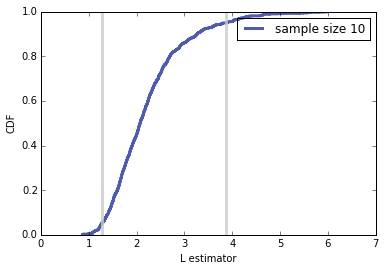

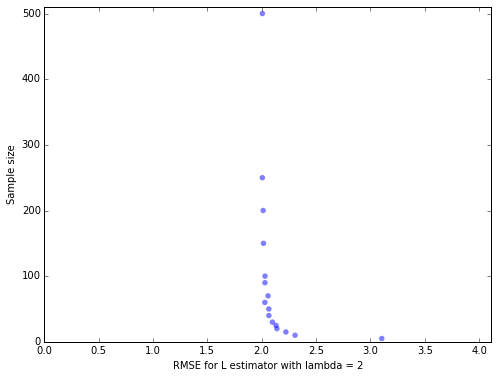

For larger sample sizes, the standard error approaches not zero, but lambda=2.For example, it  is around 3 for n=5 but close to 2 for n>=30. Similar obervation was made when lambda was selected as 6(below).


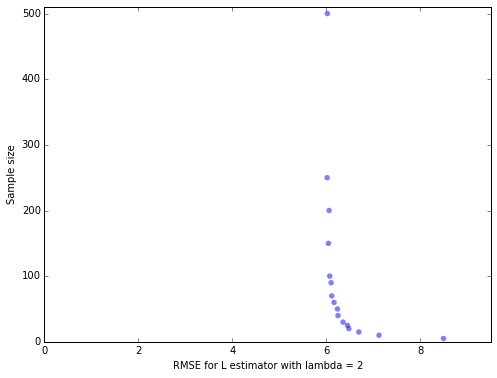

In [76]:
import numpy as np
import math
import thinkplot
import thinkstats2
from estimation import RMSE, MeanError
%matplotlib inline

        
def SimulateSampleFromExponential(lam=2, n=10, m=1000):
    means = []
    for j in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        means.append(L)
    cdf = thinkstats2.Cdf(means, label='sample size %d' % n)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    rmse = RMSE(means, 1/lam)
    return (cdf, ci, rmse)

# function obtained from solution file
def VerticalLine(x, y=1, width=3):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=width)
   
(cdf, ci, rmse) = SimulateSampleFromExponential(n=10)

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
VerticalLine(ci[0])
VerticalLine(ci[1])
thinkplot.Show(xlabel='L estimator', ylabel='CDF')

lam = 2
sampleSizes = [5,10,15,20, 25,30,40,50,60,70,90, 100, 150, 200, 250, 500]
# 3rd output of the function SimulateSampleFromExponential has index 2
standardErrors = [SimulateSampleFromExponential(n=i, lam=lam,m=1000)[2] for i in sampleSizes]

def plotRMSEvsSampleSize(standardErrors, sampleSizes, lam,label='label'):

    thinkplot.Scatter(standardErrors, sampleSizes, alpha=0.5)
    thinkplot.Show(xlabel='RMSE for L estimator with lambda = %d' % lam,
                   ylabel="Sample size",
                   axis=[0,max(standardErrors)+1,0,max(sampleSizes)+10])

plotRMSEvsSampleSize(standardErrors, sampleSizes, lam)
print('For larger sample sizes, the standard error approaches not zero, but lambda=2.For example, it  is around 3 for n=5 but close to 2 for n>=30. Similar obervation was made when lambda was selected as 6(below).')
standardErrors = [SimulateSampleFromExponential(n=i, lam=6,m=1000)[2] for i in sampleSizes]
plotRMSEvsSampleSize(standardErrors, sampleSizes, lam)

-----------------------------------------------------------------------------------------

### <a id='6'></a> Exercise 6
(Think Stats Ex 2.1 Bayes)

The cookie problem is a problem discussed in sections 1.3, 2.2 and 2.3 of Think Bayes. Solve the following problem. In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.

In [1]:
# get this file from:  https://github.com/AllenDowney/ThinkBayes/blob/master/thinkbayes.py
from thinkbayes import Pmf

In [4]:
class Cookie(Pmf):
    """A map from string bowl ID to probablity."""

    def __init__(self, hypos):
        """Initialize self.

        hypos: sequence of string bowl IDs
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()

    def Update(self, data):
        """Updates the PMF with new data.

        data: string cookie type
        """
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
            self.Normalize()

    mixes = {
        'Bowl 1':dict(vanilla=30, chocolate=10),
        'Bowl 2':dict(vanilla=20, chocolate=20),
        }

    def Likelihood(self, data, hypo):
        """The likelihood of the data under the hypothesis.
        Modified by Revanth
        data: string cookie type
        hypo: string bowl ID
        """
        mix = self.mixes[hypo]
        like = mix[data]
        self.mixes[hypo][data]=self.mixes[hypo][data]-1
        print(mix)
        return like

In [3]:
def main():
    hypos = ['Bowl 1', 'Bowl 2']

    pmf = Cookie(hypos)
    print('Mixes/Probabilities after removing  1 vanilla without replacement')
    pmf.Update('vanilla')

    for hypo, prob in pmf.Items():
        print hypo, prob

    print('\n Mixes/Probabilities after removing 1 vanilla, 1 chocolate without replacement')
    pmf.Update('chocolate')
    for hypo, prob in pmf.Items():
        print hypo, prob

if __name__ == '__main__':
    main()

Mixes/Probabilities after removing  1 vanilla without replacement
{'vanilla': 19, 'chocolate': 20}
{'vanilla': 29, 'chocolate': 10}
Bowl 2 0.4
Bowl 1 0.6

 Mixes/Probabilities after removing 1 vanilla, 1 chocolate without replacement
{'vanilla': 19, 'chocolate': 19}
{'vanilla': 29, 'chocolate': 9}
Bowl 2 0.571428571429
Bowl 1 0.428571428571
